In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('Kaggle_Test_Dataset_v2.csv',low_memory=False)
test = pd.read_csv('Kaggle_Training_Dataset_v2.csv',low_memory=False)


In [3]:
test.tail(2)


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,...,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
train.tail(2)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
242074,3526991,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242075,(242075 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
test=test.drop(test.iloc[-1:].index,inplace=False)   # remove last rows
train=train.drop(train.iloc[-1:].index,inplace=False)   # remove last rows

In [6]:
df = train.append(test)    # merge both the file and create single dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1929935 entries, 0 to 1687859
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   sku                object 
 1   national_inv       float64
 2   lead_time          float64
 3   in_transit_qty     float64
 4   forecast_3_month   float64
 5   forecast_6_month   float64
 6   forecast_9_month   float64
 7   sales_1_month      float64
 8   sales_3_month      float64
 9   sales_6_month      float64
 10  sales_9_month      float64
 11  min_bank           float64
 12  potential_issue    object 
 13  pieces_past_due    float64
 14  perf_6_month_avg   float64
 15  perf_12_month_avg  float64
 16  local_bo_qty       float64
 17  deck_risk          object 
 18  oe_constraint      object 
 19  ppap_risk          object 
 20  stop_auto_buy      object 
 21  rev_stop           object 
 22  went_on_backorder  object 
dtypes: float64(15), object(8)
memory usage: 353.4+ MB


Product went on backorder 13981 times 0.7244285429302023 %
Product Not went on backorder 1915954 times 99.2755714570698 %


([<matplotlib.patches.Wedge at 0x25826817ee0>,
 [Text(-1.0997151375435508, 0.02503230428005669, 'Product Not went on backorder'),
  Text(1.2996633440234235, -0.029583647541384123, 'Product went on backorder')],
 [Text(-0.5998446204783003, 0.013653984152758194, '99.3%'),
  Text(0.7997928270913375, -0.01820532156392869, '0.7%')])

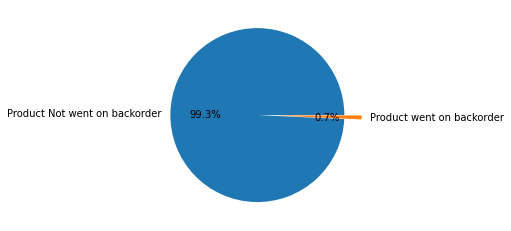

In [8]:
p = df.went_on_backorder.value_counts()
print("Product went on backorder",p[1], "times",(p[1]*100/(p[1]+p[0])) , "%")
print("Product Not went on backorder",p[0], "times" , (p[0]*100/(p[1]+p[0])), "%")

fig, ax = plt.subplots()

labels = ['Product Not went on backorder', 
         'Product went on backorder']
explode = (0, 0.2) 
percentages = [p[0]*100/(p[1]+p[0]), p[1]*100/(p[1]+p[0])]

#Draw pie chart 
ax.pie(percentages, labels=labels, shadow=False,explode=explode,autopct='%1.1f%%')


In [9]:
df.head(5)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No


In [10]:

df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [11]:
df.tail(5)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687855,1407754,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,...,0.0,0.69,0.69,5.0,Yes,No,No,Yes,No,No
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,...,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,...,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No


In [12]:
df.isna().sum()  # checking for Nan


sku                       0
national_inv              0
lead_time            115617
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg          0
perf_12_month_avg         0
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

In [13]:
df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [14]:
import matplotlib.pyplot as plt

def univariate_plot (data_df, x_l, Y_l ):


  p1 = data_df[x_l].loc[data_df[Y_l] == "No"].value_counts()
  p2 = data_df[x_l].loc[data_df[Y_l] == "Yes"].value_counts()

  df1 = pd.DataFrame({'Not_went_on_backorder': p1,
                    'went_on_backorder': p2})
  print(df1)
  fig.suptitle('stop_auto_buy = No')
  ax = df1.plot.bar(rot=100)

  print(x_l," state is No", "Product Not went on backorder",p1["No"], "times",  (p1["No"]*100/(p1[1]+p1[0]+p2[1]+p2[0])) , "%")
  print(x_l," state is No", "Product went on backorder",p2["No"], "times",  (p2["No"]*100/(p1[1]+p1[0]+p2[1]+p2[0])) , "%")

  
  print(x_l," state is Yes", "Product Not went on backorder",p1["Yes"], "times",  (p1["Yes"]*100/(p1[1]+p1[0]+p2[1]+p2[0])) , "%")
  print(x_l," state is Yes", "Product went on backorder",p2["Yes"], "times",  (p2["Yes"]*100/(p1[1]+p1[0]+p2[1]+p2[0])) , "%")


  

     Not_went_on_backorder  went_on_backorder
Yes                1845988              13403
No                   69966                578
stop_auto_buy  state is No Product Not went on backorder 69966 times 3.6253034428620654 %
stop_auto_buy  state is No Product went on backorder 578 times 0.029949195180148554 %
stop_auto_buy  state is Yes Product Not went on backorder 1845988 times 95.65026801420773 %
stop_auto_buy  state is Yes Product went on backorder 13403 times 0.6944793477500537 %


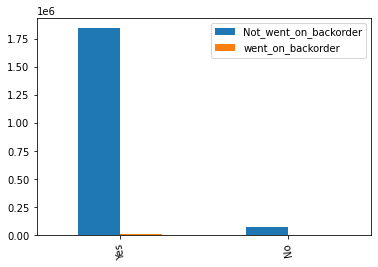

In [15]:
univariate_plot (df, 'stop_auto_buy', 'went_on_backorder')

     Not_went_on_backorder  went_on_backorder
No                 1915671              13972
Yes                    283                  9
oe_constraint  state is No Product Not went on backorder 1915671 times 99.26090775077917 %
oe_constraint  state is No Product went on backorder 13972 times 0.7239622059810304 %
oe_constraint  state is Yes Product Not went on backorder 283 times 0.014663706290626369 %
oe_constraint  state is Yes Product went on backorder 9 times 0.0004663369491718633 %


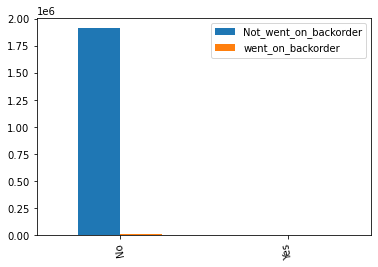

In [16]:
univariate_plot (df, 'oe_constraint', 'went_on_backorder')

     Not_went_on_backorder  went_on_backorder
No                 1482778              11704
Yes                 433176               2277
deck_risk  state is No Product Not went on backorder 1482778 times 76.83046320212857 %
deck_risk  state is No Product went on backorder 11704 times 0.6064452947897209 %
deck_risk  state is Yes Product Not went on backorder 433176 times 22.44510825494123 %
deck_risk  state is Yes Product went on backorder 2277 times 0.11798324814048142 %


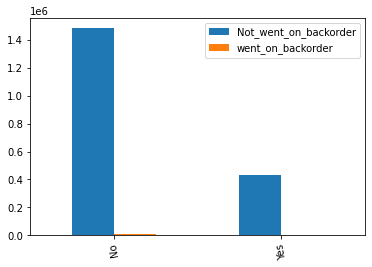

In [17]:
univariate_plot (df, 'deck_risk', 'went_on_backorder')

     Not_went_on_backorder  went_on_backorder
No                 1685533              11850
Yes                 230421               2131
ppap_risk  state is No Product Not went on backorder 1685533 times 87.33625743872203 %
ppap_risk  state is No Product went on backorder 11850 times 0.61401031640962 %
ppap_risk  state is Yes Product Not went on backorder 230421 times 11.939314018347769 %
ppap_risk  state is Yes Product went on backorder 2131 times 0.1104182265205823 %


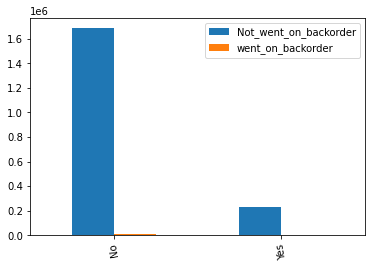

In [18]:
univariate_plot (df, 'ppap_risk', 'went_on_backorder')

     Not_went_on_backorder  went_on_backorder
No                 1915119              13977
Yes                    835                  4
rev_stop  state is No Product Not went on backorder 1915119 times 99.23230575122996 %
rev_stop  state is No Product went on backorder 13977 times 0.7242212820639037 %
rev_stop  state is Yes Product Not went on backorder 835 times 0.04326570583983398 %
rev_stop  state is Yes Product went on backorder 4 times 0.00020726086629860592 %


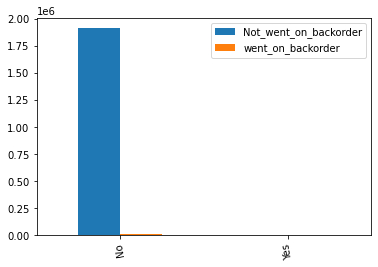

In [19]:
univariate_plot (df, 'rev_stop', 'went_on_backorder')

     Not_went_on_backorder  went_on_backorder
No                 1915019              13927
Yes                    935                 54
potential_issue  state is No Product Not went on backorder 1915019 times 99.2271242295725 %
potential_issue  state is No Product went on backorder 13927 times 0.7216305212351711 %
potential_issue  state is Yes Product Not went on backorder 935 times 0.048447227497299135 %
potential_issue  state is Yes Product went on backorder 54 times 0.0027980216950311797 %


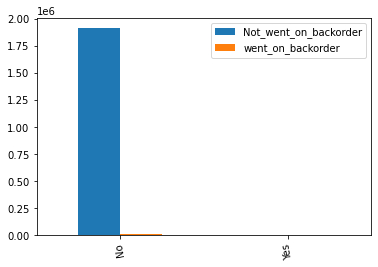

In [20]:
univariate_plot (df, 'potential_issue', 'went_on_backorder')

In [21]:
df.head(2)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.0,-99.0,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.0,-99.0,0.0,No,No,Yes,No,No,No


<AxesSubplot:>

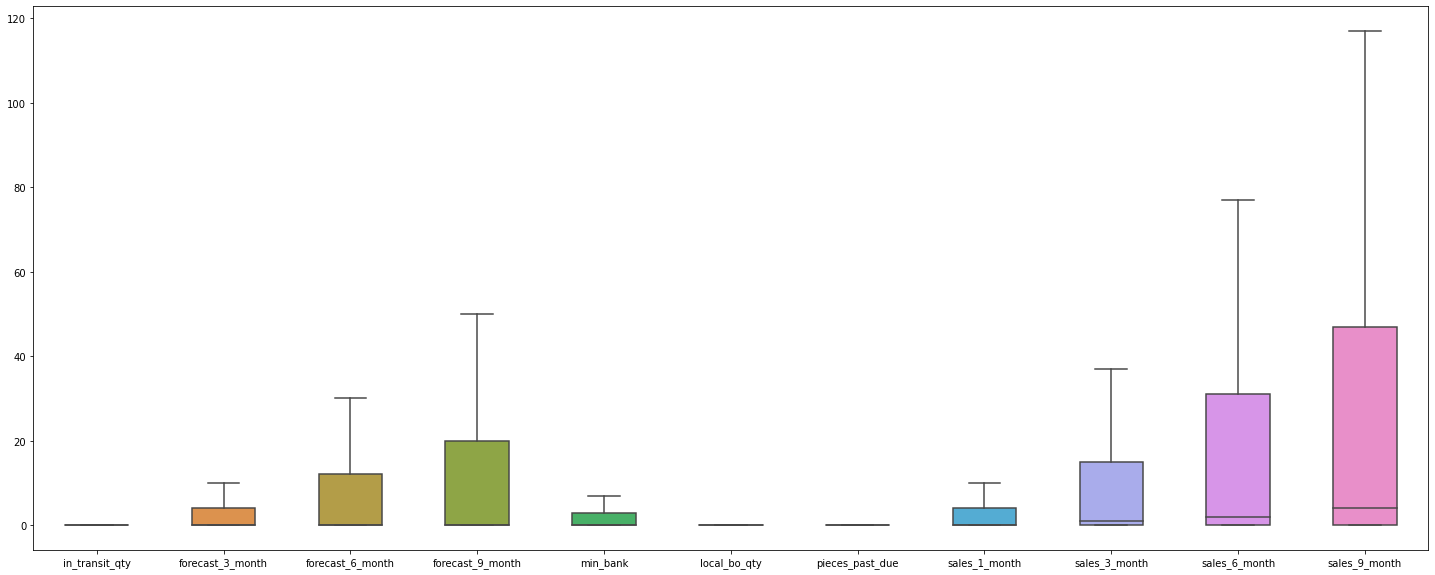

In [22]:
num_data = [ 'in_transit_qty', 'forecast_3_month', 
                   'forecast_6_month', 'forecast_9_month', 'min_bank',
                   'local_bo_qty', 'pieces_past_due', 'sales_1_month', 
                   'sales_3_month', 'sales_6_month', 'sales_9_month',]
fig,ax = plt.subplots(figsize=(25,10),facecolor='white')
sns.boxplot(data=df[num_data],ax=ax,width=0.5,fliersize=4,showfliers=False)   # will not Show the outliers beyond the caps.

In [23]:
print(df.columns)

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')


In [24]:
from sklearn.preprocessing import normalize    # normalize all numeric value
qty_related = ['national_inv', 'in_transit_qty', 'forecast_3_month', 
                   'forecast_6_month', 'forecast_9_month', 'min_bank',
                   'local_bo_qty', 'pieces_past_due', 'sales_1_month', 
                   'sales_3_month', 'sales_6_month', 'sales_9_month',]
df[qty_related] = normalize(df[qty_related], axis=1)

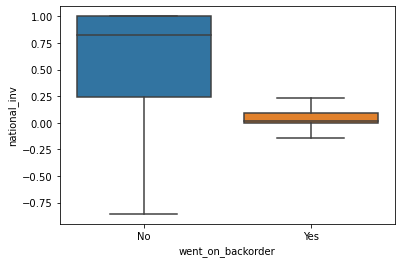

In [25]:
sns.boxplot(  x=df["went_on_backorder"] ,y=df["national_inv"],showfliers=False)
plt.show()

In [26]:
### to remove ourliers if required
Q1 = df['national_inv'].quantile(0.25)
Q3 = df['national_inv'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['national_inv'] >= Q1 - 1.5 * IQR) & (df['national_inv'] <= Q3 + 1.5 *IQR)
df = df.loc[filter] 

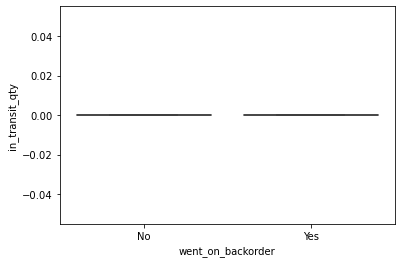

In [27]:
sns.boxplot(  x=df["went_on_backorder"] ,y=df["in_transit_qty"],showfliers=False)
plt.show()

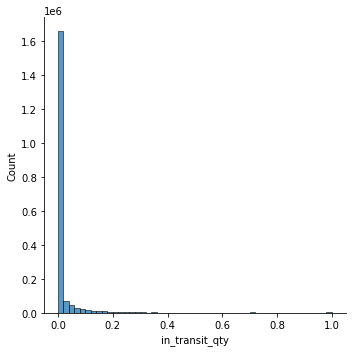

In [28]:
sns.displot(df.in_transit_qty,bins=50)

In [29]:
for i in range(10):
  quantileValues = df.in_transit_qty.quantile((i*10)/100);

  print((i*10),"th percentile:");

  print(quantileValues);

0 th percentile:
0.0
10 th percentile:
0.0
20 th percentile:
0.0
30 th percentile:
0.0
40 th percentile:
0.0
50 th percentile:
0.0
60 th percentile:
0.0
70 th percentile:
0.0
80 th percentile:
0.0004756423436344295
90 th percentile:
0.043629727957184075


In [30]:
for i in range(11):
  quantileValues = df.in_transit_qty.quantile((i+90)/100);

  print((i+90),"th percentile:");

  print(quantileValues);

90 th percentile:
0.043629727957184075
91 th percentile:
0.051366204630546
92 th percentile:
0.060509455946437016
93 th percentile:
0.07181965645318185
94 th percentile:
0.08714338366058237
95 th percentile:
0.10852540252214048
96 th percentile:
0.13907768253512284
97 th percentile:
0.1824654600203458
98 th percentile:
0.2581988897471611
99 th percentile:
0.4472429538032744
100 th percentile:
1.0


In [31]:
for i in range(11):
  quantileValues = df.in_transit_qty.quantile((i+990)/1000);

  print((i+990)/10,"th percentile:");

  print(quantileValues);

99.0 th percentile:
0.4472429538032744
99.1 th percentile:
0.4931969619160719
99.2 th percentile:
0.5269229243298007
99.3 th percentile:
0.5834599659915782
99.4 th percentile:
0.6492299143348838
99.5 th percentile:
0.7053456158585982
99.6 th percentile:
0.7071067811865476
99.7 th percentile:
0.8219949365267865
99.8 th percentile:
0.9577042613611466
99.9 th percentile:
1.0
100.0 th percentile:
1.0


<AxesSubplot:>

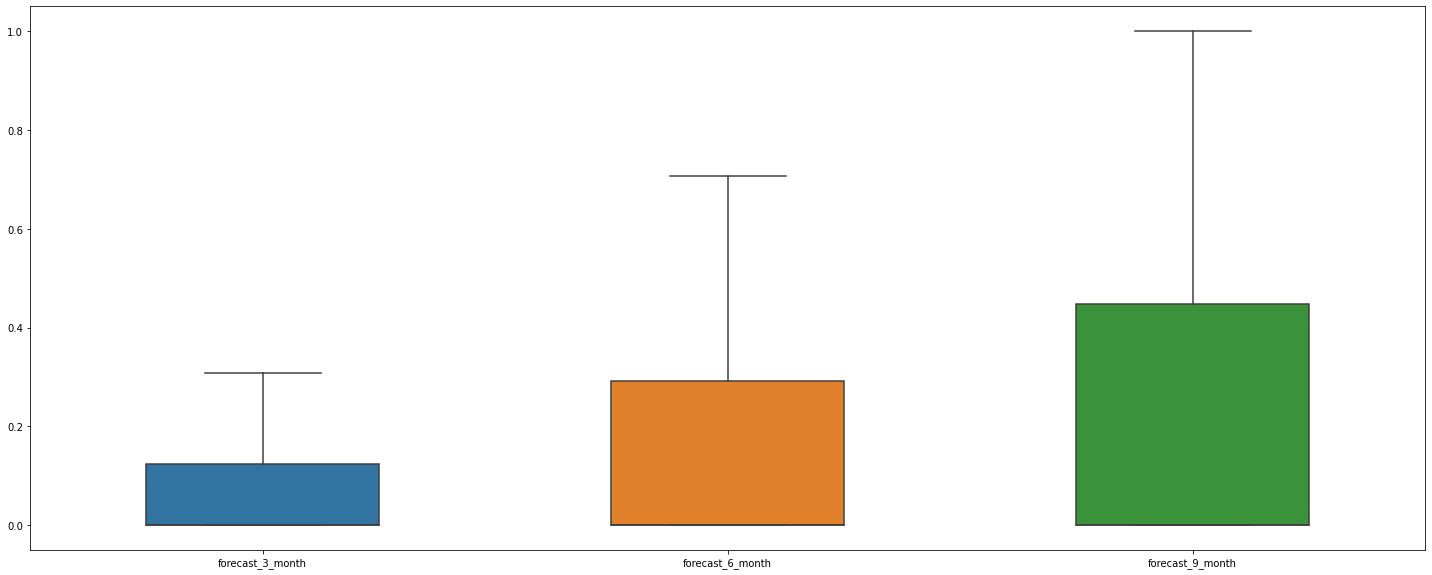

In [32]:
num_data = [ 'forecast_3_month','forecast_6_month', 'forecast_9_month',]
fig,ax = plt.subplots(figsize=(25,10),facecolor='white')
sns.boxplot(data=df[num_data],ax=ax,width=0.5,fliersize=4,showfliers=False)   # will not Show the outliers beyond the caps.

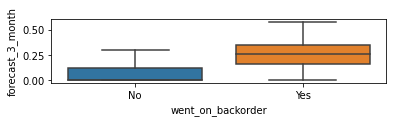

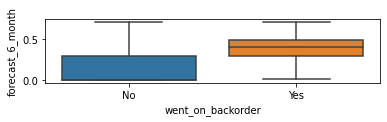

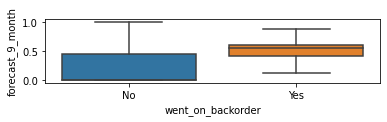

In [33]:
plt.subplot(3,1,1)
sns.boxplot(  x=df["went_on_backorder"] ,y=df["forecast_3_month"],showfliers=False)
plt.show()
plt.subplot(3,1,2)

sns.boxplot(  x=df["went_on_backorder"] ,y=df["forecast_6_month"],showfliers=False)
plt.show()
plt.subplot(3,1,3)

sns.boxplot(  x=df["went_on_backorder"] ,y=df["forecast_9_month"],showfliers=False)
plt.show()

<AxesSubplot:ylabel='Density'>

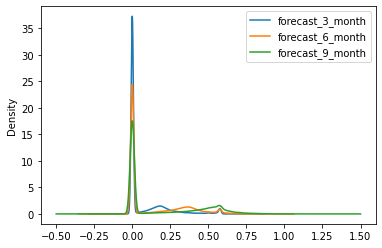

In [34]:
qty_related = ['forecast_3_month', 'forecast_6_month', 'forecast_9_month',]
df[qty_related].plot.kde()

In [35]:
corr = df[qty_related].corr()
corr.style.background_gradient(cmap='coolwarm')

,forecast_3_month,forecast_6_month,forecast_9_month
forecast_3_month,1.000000,0.857126,0.743367
forecast_6_month,0.857126,1.000000,0.924968
forecast_9_month,0.743367,0.924968,1.000000


             sku  national_inv  lead_time  in_transit_qty  forecast_3_month  \
0        3285085      0.999870        NaN        0.000000          0.000000   
1        3285131      0.993884        NaN        0.000000          0.000000   
2        3285358      1.000000        8.0        0.000000          0.000000   
3        3285517      0.976187        2.0        0.000000          0.000000   
4        3285608      1.000000        8.0        0.000000          0.000000   
...          ...           ...        ...             ...               ...   
1687855  1407754      0.000000        2.0        0.000000          0.472456   
1687856  1373987     -0.064550        NaN        0.000000          0.322749   
1687857  1524346     -0.041451        9.0        0.000000          0.290159   
1687858  1439563      0.196185        9.0        0.050628          0.123407   
1687859  1502009      0.613222        4.0        0.000000          0.000000   

         forecast_6_month  forecast_9_month  sales_

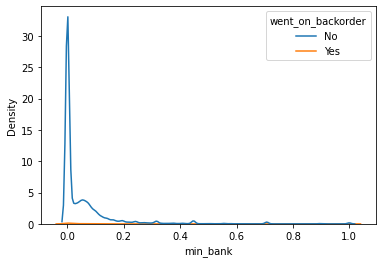

In [36]:
print(df)
df = df.reset_index()
print(df)

sns.kdeplot(data=df, x="min_bank", hue="went_on_backorder")

def reindex(df):
    df = df.reset_index(drop=True)
    # continue with reindexing as needed
    return df


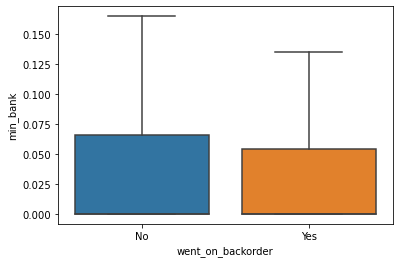

In [37]:
sns.boxplot(  x=df["went_on_backorder"] ,y=df["min_bank"],showfliers=False );
plt.show()


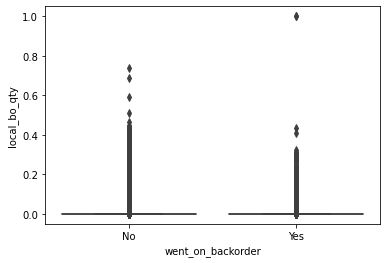

In [38]:
sns.boxplot(  x=df["went_on_backorder"] ,y=df["local_bo_qty"],);
plt.show()


In [39]:
for i in range(11):
  quantileValues = df.local_bo_qty.quantile((i+90)/100);

  print((i+90),"th percentile:");

  print(quantileValues);

90 th percentile:
0.0
91 th percentile:
0.0
92 th percentile:
0.0
93 th percentile:
0.0
94 th percentile:
0.0
95 th percentile:
0.0
96 th percentile:
0.0
97 th percentile:
0.0
98 th percentile:
0.0
99 th percentile:
0.0012567437915481587
100 th percentile:
1.0


In [40]:
for i in range(11):
  quantileValues = df.local_bo_qty.quantile((i+990)/1000);

  print((i+990)/10,"th percentile:");

  print(quantileValues);

99.0 th percentile:
0.0012567437915481587
99.1 th percentile:
0.0019306126506912896
99.2 th percentile:
0.002857329754415112
99.3 th percentile:
0.004297731755543876
99.4 th percentile:
0.006817982212806014
99.5 th percentile:
0.011181794372802575
99.6 th percentile:
0.019480930197663147
99.7 th percentile:
0.033310402605570076
99.8 th percentile:
0.05703564598335761
99.9 th percentile:
0.10811154400277076
100.0 th percentile:
1.0


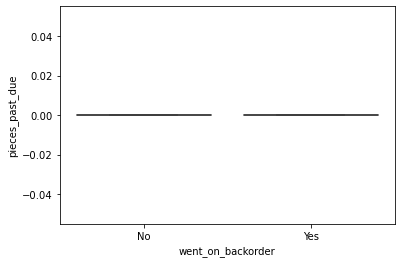

90 th percentile:
0.0
91 th percentile:
0.0
92 th percentile:
0.0
93 th percentile:
0.0
94 th percentile:
0.0
95 th percentile:
0.0
96 th percentile:
0.0
97 th percentile:
0.0
98 th percentile:
0.0
99 th percentile:
0.019888951773401276
100 th percentile:
1.0


In [41]:
sns.boxplot(  x=df["went_on_backorder"] ,y=df["pieces_past_due"],showfliers=False);
plt.show()
for i in range(11):
  quantileValues = df.pieces_past_due.quantile((i+90)/100);

  print((i+90),"th percentile:");

  print(quantileValues);

In [42]:
for i in range(11):
  quantileValues = df.pieces_past_due.quantile((i+990)/1000);

  print((i+990)/10,"th percentile:");

  print(quantileValues);

99.0 th percentile:
0.019888951773401276
99.1 th percentile:
0.024950737787654168
99.2 th percentile:
0.031080662051129547
99.3 th percentile:
0.03905820113062225
99.4 th percentile:
0.05040445397627769
99.5 th percentile:
0.06893178876270188
99.6 th percentile:
0.09651162386929166
99.7 th percentile:
0.133871385662208
99.8 th percentile:
0.19611613513818404
99.9 th percentile:
0.33562019003443444
100.0 th percentile:
1.0


<AxesSubplot:ylabel='Density'>

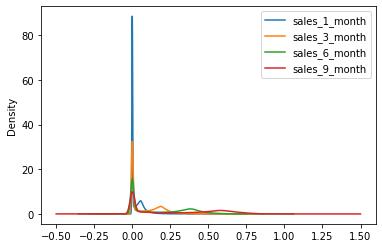

In [43]:
qty_related = ['sales_1_month', 'sales_3_month', 'sales_6_month','sales_9_month',]
df[qty_related].plot.kde()

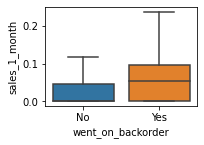

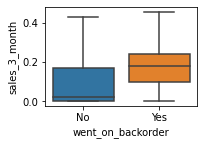

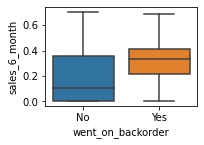

In [44]:
plt.subplot(2,2,1)
sns.boxplot(  x=df["went_on_backorder"] ,y=df["sales_1_month"],showfliers=False)
plt.show()
plt.subplot(2,2,2)

sns.boxplot(x=df["went_on_backorder"] ,y=df["sales_3_month"],showfliers=False)
plt.show()
plt.subplot(2,2,3)

sns.boxplot(x=df["went_on_backorder"] ,y=df["sales_6_month"],showfliers=False)
plt.show()

In [45]:
corr = df[qty_related].corr()
corr.style.background_gradient(cmap='coolwarm')

,sales_1_month,sales_3_month,sales_6_month,sales_9_month
sales_1_month,1.000000,0.698887,0.576552,0.525471
sales_3_month,0.698887,1.000000,0.843504,0.773269
sales_6_month,0.576552,0.843504,1.000000,0.924155
sales_9_month,0.525471,0.773269,0.924155,1.000000


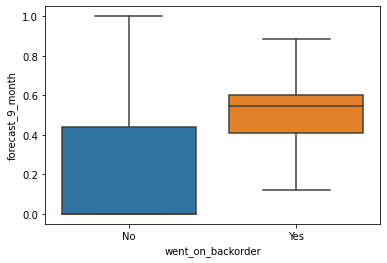

In [46]:
sns.boxplot(x=df["went_on_backorder"],y=df["forecast_9_month"],showfliers=False);
plt.show()

In [47]:
df.perf_6_month_avg.value_counts()

 0.99     163317
 1.00     150327
-99.00    148575
 0.73     128818
 0.98      97386
           ...  
 0.20        921
 0.03        829
 0.04        724
 0.01        648
 0.29        572
Name: perf_6_month_avg, Length: 102, dtype: int64

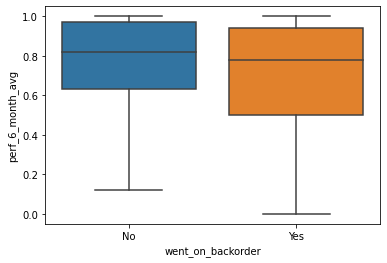

In [48]:
sns.boxplot(  x=df["went_on_backorder"] ,y=df["perf_6_month_avg"],showfliers=False);
plt.show()

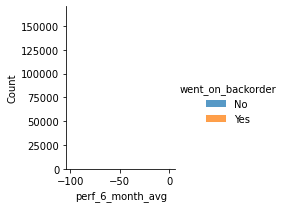

In [49]:
sns.FacetGrid(df,hue="went_on_backorder").map(sns.histplot,"perf_6_month_avg").add_legend()

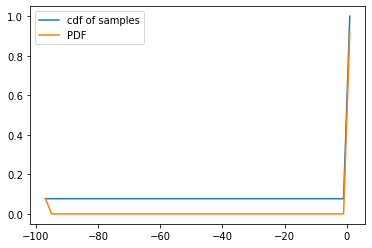

In [50]:
#https://www.geeksforgeeks.org/how-to-calculate-and-plot-a-cumulative-distribution-function-with-matplotlib-in-python/
import numpy as np

# Sample from a normal distribution using numpy's random number generator
samples = df.perf_6_month_avg

# Compute a histogram of the sample

histogram, bins = np.histogram(samples, bins=50, density=True)



# Compute the PDF on the bin centers from scipy distribution object
from scipy import stats
pdf = histogram/(sum(histogram))
cdf = np.cumsum(pdf)
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(bins[1:], cdf, label="cdf of samples")
plt.plot(bins[1:], pdf, label="PDF")
plt.legend()
plt.show()

In [51]:
df.columns

Index(['index', 'sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

<AxesSubplot:xlabel='lead_time', ylabel='national_inv'>

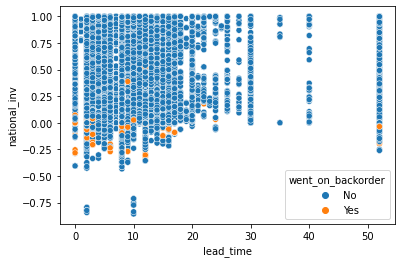

In [52]:
sns.scatterplot(x=df.lead_time, y=df.national_inv, hue=df.went_on_backorder)

<AxesSubplot:xlabel='forecast_9_month', ylabel='forecast_3_month'>

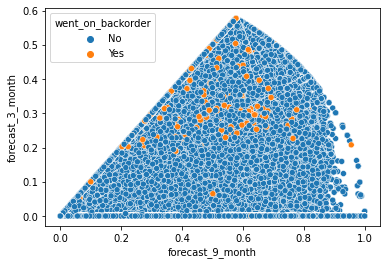

In [53]:
sns.scatterplot(x=df.forecast_9_month,y=df.forecast_3_month,hue=df.went_on_backorder)

<AxesSubplot:xlabel='forecast_9_month', ylabel='sales_3_month'>

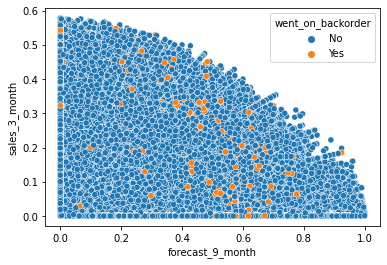

In [54]:
sns.scatterplot(x=df.forecast_9_month,y=df.sales_3_month,hue=df.went_on_backorder)

<AxesSubplot:xlabel='forecast_3_month', ylabel='national_inv'>

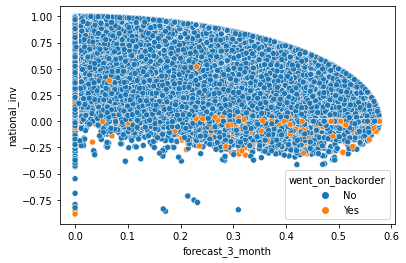

In [55]:
sns.scatterplot(x=df.forecast_3_month,y=df.national_inv,hue=df.went_on_backorder)

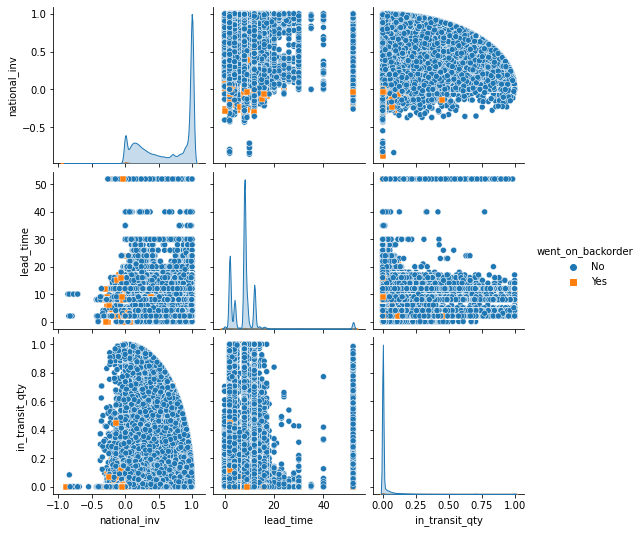

In [56]:
df = df.reset_index(drop=True) # reset index to remove any duplicate labels
cols_to_plot = df.columns[1:5].tolist() + ['went_on_backorder'] # add columns to be plotted

sns.pairplot(data=df[cols_to_plot], hue="went_on_backorder", markers=["o", "s"])
plt.show()

In [57]:
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

<Figure size 1440x1440 with 0 Axes>

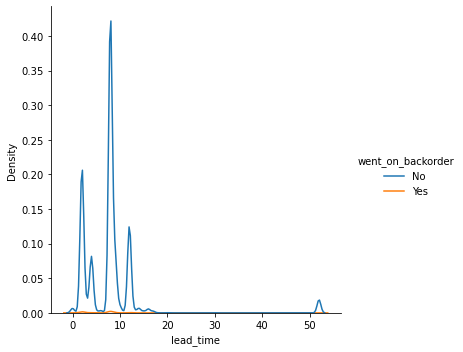

In [58]:
df = df.reset_index()
plt.figure(figsize=(20,20))
sns.displot(data=df, x="lead_time", hue="went_on_backorder", kind="kde")

In [59]:

# Imput missing lines and drop line with problem
from sklearn.impute import SimpleImputer
  

# Convert to binaries
for col in ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
               'stop_auto_buy', 'rev_stop', 'went_on_backorder']:
        df[col] = (df[col] == 'Yes').astype(int)
# Normalization    
from sklearn.preprocessing import normalize
qty_related = ['national_inv', 'in_transit_qty', 'forecast_3_month', 
                   'forecast_6_month', 'forecast_9_month', 'min_bank',
                   'local_bo_qty', 'pieces_past_due', 'sales_1_month', 
                   'sales_3_month', 'sales_6_month', 'sales_9_month',]
df[qty_related] = normalize(df[qty_related], axis=1)

In [60]:
#import pandas as pd
df_imputed = df.fillna(df.mean())

In [61]:
df1 = pd.DataFrame(df)

In [62]:
df1

,level_0,index,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,0,3285085,0.999870,NaN,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,-99.00,-99.00,0.000000,1,0,0,1,0,0
1,1,1,3285131,0.993884,NaN,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,-99.00,-99.00,0.000000,0,0,1,0,0,0
2,2,2,3285358,1.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.92,0.95,0.000000,0,0,0,1,0,0
3,3,3,3285517,0.976187,2.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.78,0.75,0.000000,0,0,1,1,0,0
4,4,4,3285608,1.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.54,0.71,0.000000,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929888,1929888,1687855,1407754,0.000000,2.0,0.000000,0.472456,0.472456,0.472456,0.00000,...,0.0,0.69,0.69,0.236228,1,0,0,1,0,0
1929889,1929889,1687856,1373987,-0.064550,NaN,0.000000,0.322749,0.451848,0.580948,0.06455,...,0.0,-99.00,-99.00,0.064550,0,0,0,1,0,0
1929890,1929890,1687857,1524346,-0.041451,9.0,0.000000,0.290159,0.373062,0.455965,0.00000,...,0.0,0.86,0.84,0.041451,1,0,0,0,0,1
1929891,1929891,1687858,1439563,0.196185,9.0,0.050628,0.123407,0.275292,0.398698,0.11075,...,0.0,0.86,0.84,0.018986,0,0,0,1,0,0


In [63]:
df1.to_csv('df_missing_through_model.csv', index=False)

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [65]:
df2 = pd.read_csv('df_missing_through_model.csv')
df2.head(5)

,level_0,index,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,0,3285085,0.999870,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
1,1,1,3285131,0.993884,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,0,0,1,0,0,0
2,2,2,3285358,1.000000,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92,0.95,0.0,0,0,0,1,0,0
3,3,3,3285517,0.976187,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.78,0.75,0.0,0,0,1,1,0,0
4,4,4,3285608,1.000000,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.54,0.71,0.0,0,0,0,1,0,0


In [66]:
df2.columns

Index(['level_0', 'index', 'sku', 'national_inv', 'lead_time',
       'in_transit_qty', 'forecast_3_month', 'forecast_6_month',
       'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month',
       'sales_9_month', 'min_bank', 'potential_issue', 'pieces_past_due',
       'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty', 'deck_risk',
       'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop',
       'went_on_backorder'],
      dtype='object')

In [67]:
df2.head(5)

,level_0,index,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,0,3285085,0.999870,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
1,1,1,3285131,0.993884,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,0,0,1,0,0,0
2,2,2,3285358,1.000000,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92,0.95,0.0,0,0,0,1,0,0
3,3,3,3285517,0.976187,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.78,0.75,0.0,0,0,1,1,0,0
4,4,4,3285608,1.000000,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.54,0.71,0.0,0,0,0,1,0,0


In [68]:
X = df2.drop(['went_on_backorder','sku'],axis=1)
y = df2['went_on_backorder']

In [69]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7)

# transform the dataset
rus = RandomUnderSampler(sampling_strategy=0.75)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [70]:

# RandomForestClassifier classifier used
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Replace missing values with mean of column
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Fit the model and make predictions
rf = RandomForestClassifier()
rfc=rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))



[[574630    144]
 [  3840    354]]
0.9931187906758232
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    574774
           1       0.71      0.08      0.15      4194

    accuracy                           0.99    578968
   macro avg       0.85      0.54      0.57    578968
weighted avg       0.99      0.99      0.99    578968



In [71]:
from sklearn.metrics import roc_auc_score, average_precision_score, make_scorer

roc =  roc_auc_score(y_test, y_pred)
print("AUC Score is :", roc)

AUC Score is : 0.5420778807268269


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, average_precision_score, make_scorer
from sklearn.impute import SimpleImputer

#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.15, random_state=70)



imp = SimpleImputer(strategy="mean")
X = imp.fit_transform(X) # Impute missing values with mean
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15, random_state=70)

# Use SMOTE to oversample the minority class
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

# Train a RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Evaluate the model performance
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
roc =  roc_auc_score(y_test, y_pred)
print("AUC Score is :", roc)

[[285366   2021]
 [  1283    814]]
0.9885865885506625
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    287387
           1       0.29      0.39      0.33      2097

    accuracy                           0.99    289484
   macro avg       0.64      0.69      0.66    289484
weighted avg       0.99      0.99      0.99    289484

AUC Score is : 0.6905706260390485


In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import numpy as np

# Replace NaN values with mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, stratify=y, test_size=0.15, random_state=70)

# transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3 = LogisticRegression()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

pred1 = model1.predict_proba(X_test)
pred2 = model2.predict_proba(X_test)
pred3 = model3.predict_proba(X_test)

finalpred = (pred1 + pred2 + pred3) / 3

y_pred = np.argmax(finalpred, axis=1)

print("Accuracy score:", accuracy_score(y_test, y_pred))


Accuracy score: 0.9603259592930871


In [74]:

print(confusion_matrix(y_test,np.argmax(finalpred,axis=1)))
print(accuracy_score(y_test,np.argmax(finalpred,axis=1)))
print(classification_report(y_test,np.argmax(finalpred,axis=1)))
from sklearn.metrics import roc_auc_score, average_precision_score, make_scorer

roc =  roc_auc_score(y_test, np.argmax(finalpred,axis=1))
print("AUC Score is :", roc)

[[277239  10148]
 [  1337    760]]
0.9603259592930871
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    287387
           1       0.07      0.36      0.12      2097

    accuracy                           0.96    289484
   macro avg       0.53      0.66      0.55    289484
weighted avg       0.99      0.96      0.97    289484

AUC Score is : 0.6635556190882292


In [75]:
roc =  roc_auc_score(y_test, np.argmax(pred1,axis=1))
print("AUC Score is :", roc)

AUC Score is : 0.6852062095309933


In [76]:
roc =  roc_auc_score(y_test, np.argmax(pred2,axis=1))
print("AUC Score is :", roc)

AUC Score is : 0.5609278140876267


In [77]:
roc =  roc_auc_score(y_test, np.argmax(pred3,axis=1))
print("AUC Score is :", roc)

AUC Score is : 0.551503387106404


In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.15, random_state=70)

In [79]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns = NearMiss()
X_train_ns, y_train_ns = ns.fit_resample(X_train, y_train)
print("Original dataset shape:", Counter(y_train))
print("Resampled dataset shape:", Counter(y_train_ns))



Original dataset shape: Counter({0: 1628525, 1: 11884})
Resampled dataset shape: Counter({0: 11884, 1: 11884})


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=500, max_depth=5, min_samples_split=15,)
rfc=rf.fit(X_train_ns, y_train_ns)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[217750  69637]
 [   203   1894]]
0.7587431429716323
              precision    recall  f1-score   support

           0       1.00      0.76      0.86    287387
           1       0.03      0.90      0.05      2097

    accuracy                           0.76    289484
   macro avg       0.51      0.83      0.46    289484
weighted avg       0.99      0.76      0.86    289484



In [81]:
from sklearn.metrics import roc_auc_score, average_precision_score, make_scorer

roc =  roc_auc_score(y_test, y_pred)
print("AUC Score is :", roc)

AUC Score is : 0.8304420748224038


In [82]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.15, random_state=70)

# transform the dataset


oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [83]:
clf = AdaBoostClassifier(algorithm = "SAMME.R", learning_rate = 0.1)
clf.fit(X_train,y_train) 
y_pred = clf.predict(X_test)

In [84]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
from sklearn.metrics import roc_auc_score, average_precision_score, make_scorer

roc =  roc_auc_score(y_test, y_pred)
print("AUC Score is :", roc)

[[237190  50197]
 [   368   1729]]
0.8253271337966865
              precision    recall  f1-score   support

           0       1.00      0.83      0.90    287387
           1       0.03      0.82      0.06      2097

    accuracy                           0.83    289484
   macro avg       0.52      0.82      0.48    289484
weighted avg       0.99      0.83      0.90    289484

AUC Score is : 0.8249221469625202


In [85]:
X = df2.drop(['went_on_backorder','sku'],axis=1)
y = df2['went_on_backorder']
     

In [86]:
!pip install xgboost

In [87]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# create an instance of the imputer with mean strategy
imputer = SimpleImputer(strategy='mean')

# fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)

# apply SMOTE on the imputed data
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

# transform the testing data using the trained imputer
X_test_imputed = imputer.transform(X_test)

# train the model on the resampled data
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, make_scorer

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train_resampled, y_train_resampled)

    roc = roc_auc_score(y_test, gb_clf.predict(X_test_imputed))

    print("Gradient Boosting algorithm at lr", learning_rate, "AUC Score is", roc)


Gradient Boosting algorithm at lr 0.05 AUC Score is 0.7596349490695469
Gradient Boosting algorithm at lr 0.075 AUC Score is 0.762278458693953
Gradient Boosting algorithm at lr 0.1 AUC Score is 0.7661929105152597
Gradient Boosting algorithm at lr 0.25 AUC Score is 0.790908793163794
Gradient Boosting algorithm at lr 0.5 AUC Score is 0.80424728202226
Gradient Boosting algorithm at lr 0.75 AUC Score is 0.7722288123598609
Gradient Boosting algorithm at lr 1 AUC Score is 0.7801860399564


In [88]:
df2.columns

Index(['level_0', 'index', 'sku', 'national_inv', 'lead_time',
       'in_transit_qty', 'forecast_3_month', 'forecast_6_month',
       'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month',
       'sales_9_month', 'min_bank', 'potential_issue', 'pieces_past_due',
       'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty', 'deck_risk',
       'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop',
       'went_on_backorder'],
      dtype='object')

In [89]:
from sklearn.preprocessing import normalize
from sklearn.impute import SimpleImputer

df3 = df2.copy()

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df3[qty_related] = imputer.fit_transform(df3[qty_related])

# Normalize the data
df3[qty_related] = normalize(df3[qty_related], axis=1)


In [90]:
X = df3.drop(['went_on_backorder','sku','pieces_past_due'],axis=1)
y = df3['went_on_backorder']

In [91]:
#RandomForestClassifier with SMOTE (normalize all numeric values)

In [98]:
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score, make_scorer
from sklearn.impute import SimpleImputer
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html
#replacing the missing values
# create an instance of SimpleImputer
imputer = SimpleImputer(strategy='median')

# fit the imputer on the training data
imputer.fit(X_train)

# transform the training and test data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)


#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.15, random_state=70)

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)


#https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, make_scorer
from sklearn import tree, ensemble
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
lst = [10,15,20]
for i in lst:
  forest = ensemble.RandomForestClassifier(criterion='entropy', max_depth=i, min_samples_leaf=15)

  forest.fit(X_train, y_train)

  roc =  roc_auc_score(y_test, forest.predict(X_test))

  print("Gradient Bosssting algorithm at septh of",i, "AUC Score is ",roc )

Gradient Bosssting algorithm at septh of 10 AUC Score is  0.806347139930128
Gradient Bosssting algorithm at septh of 15 AUC Score is  0.7849763335231996
Gradient Bosssting algorithm at septh of 20 AUC Score is  0.7571819702628692


In [99]:
#stacking classifiercv

In [103]:
from sklearn.preprocessing import normalize
from sklearn.impute import SimpleImputer

df3 = df2.copy()

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df3[qty_related] = imputer.fit_transform(df3[qty_related])

# Normalize the data
df3[qty_related] = normalize(df3[qty_related], axis=1)

In [104]:
X = df3.drop(['went_on_backorder','sku','pieces_past_due'],axis=1)
y = df3['went_on_backorder']

In [109]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer




# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15, random_state=70)

# create an instance of SimpleImputer
imputer = SimpleImputer(strategy='median')

# fit the imputer on the training data
imputer.fit(X_train)

# transform the training and test data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# create SMOTE oversampling object
oversample = SMOTE()

# loop through different random states for RandomUnderSampler
for i in range(5,10,1):
    # create RandomUnderSampler object
    rus = RandomUnderSampler(random_state=i)
    # perform undersampling on the training data
    X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
    # perform oversampling on the undersampled training data
    X_train_resampled, y_train_resampled = oversample.fit_resample(X_train_rus, y_train_rus)

    # create the classifiers for stacking
    clf1 = KNeighborsClassifier(n_neighbors=1)
    clf2 = RandomForestClassifier(random_state=1)
    clf3 = GaussianNB()
    lr = LogisticRegression()
    
    # create the stacking classifier
    sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)

    # loop through the classifiers for evaluation
    for clf, label in zip([clf1, clf2, clf3, sclf], ['KNN', 'Random Forest', 'Naive Bayes', 'StackingClassifier']):
        clf.fit(X_train_resampled, y_train_resampled)

        print("Classifier", label)
        print(confusion_matrix(y_test,clf.predict(X_test)))
        print(accuracy_score(y_test,clf.predict(X_test)))
        print(classification_report(y_test,clf.predict(X_test)))
        
        roc =  roc_auc_score(y_test, clf.predict(X_test))
        print("AUC Score is :", roc)


Classifier KNN
[[157958 129429]
 [   920   1177]]
0.5497195009050586
              precision    recall  f1-score   support

           0       0.99      0.55      0.71    287387
           1       0.01      0.56      0.02      2097

    accuracy                           0.55    289484
   macro avg       0.50      0.56      0.36    289484
weighted avg       0.99      0.55      0.70    289484

AUC Score is : 0.5554565885819278
Classifier Random Forest
[[253779  33608]
 [   173   1924]]
0.8833061585441683
              precision    recall  f1-score   support

           0       1.00      0.88      0.94    287387
           1       0.05      0.92      0.10      2097

    accuracy                           0.88    289484
   macro avg       0.53      0.90      0.52    289484
weighted avg       0.99      0.88      0.93    289484

AUC Score is : 0.9002789185259485
Classifier Naive Bayes
[[119279 168108]
 [   518   1579]]
0.41749457655690814
              precision    recall  f1-score   suppor

In [115]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVC

# assuming X and y are defined

X_train1, X_test, y_train1, y_test = train_test_split(X, y, stratify=y, test_size=0.15, random_state=70)

# create an instance of SimpleImputer
imputer = SimpleImputer(strategy='median')

# fit the imputer on the training data
imputer.fit(X_train1)

# transform the training and test data
X_train = imputer.transform(X_train1)
X_test = imputer.transform(X_test)

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train1)

# define the neural network architecture
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1]))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
model.fit(X_train, y_train, epochs=10, batch_size=128)

# evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
print("Test set performance:")
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               2944      
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 activation_3 (Activation)   (None, 64)                0         
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [116]:
ff = model.predict(X_test)

9047/9047 [==============================] - 13s 1ms/step


In [117]:
roc =  roc_auc_score(y_test,ff)
print("AUC Score is :", roc)

AUC Score is : 0.500036536099406
